In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img

Saving yeast_USC.tif to yeast_USC.tif


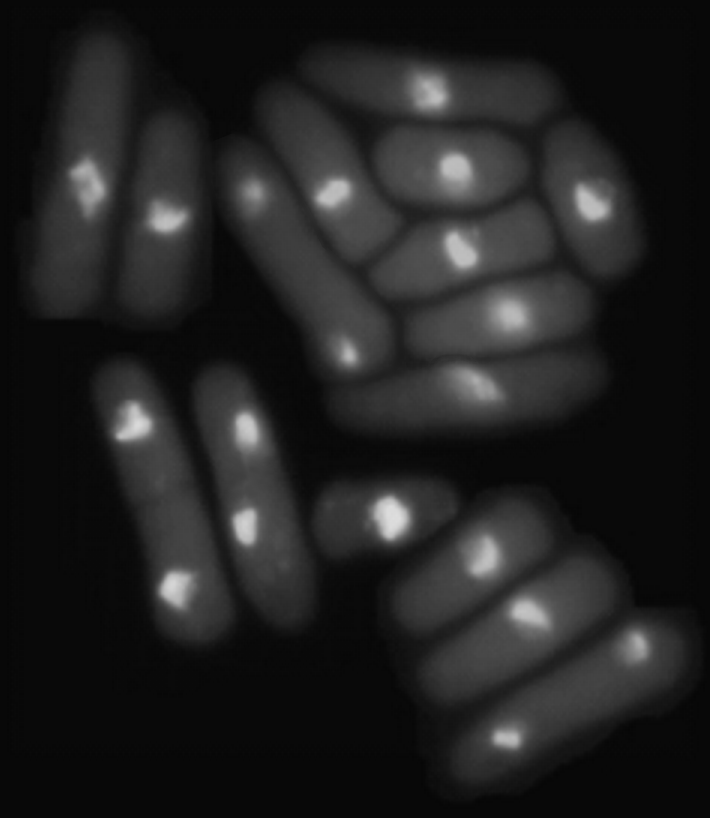

In [2]:
from google.colab import files
myfile = files.upload()

I = cv2.imread('yeast_USC.tif', cv2.IMREAD_GRAYSCALE)

from google.colab.patches import cv2_imshow 
cv2_imshow(I)

In [94]:
#Step2. OpenCV의 GaussianBlur 함수를 이용해 원래 이미지에 blur 처리를 하세요. (kernel의 크기와 sigma 값은 자유롭게)

gaussian_blur_I = cv2.GaussianBlur(I,(5,5),5)

In [95]:
def Otsu_2level(img):
    #optimal k와 그때 max를 가지는 between-class variance 초기화
    k_opt = 0
    sigma_opt = 0
    
    # normalization histogram 구하기
    hist, bins = np.histogram(img.flatten(),256,[0,256])
    norm_hist = hist / (img.shape[0]*img.shape[1])

    # nomalization histogram을 이용하여 global mean 구하기
    glo_mean = (norm_hist * range(len(norm_hist))).sum()

    # 주어진 이미지에 최저 intensity부터 최고 intensity까지 between-class variance를 구해 가장 큰 값을 만드는 k_opt를 찾음
    for k in range(img.min(),img.max()):
        P1 = norm_hist[0:k+1].sum()
        
        mean1 = (norm_hist[0:k+1] * range(k+1)).sum()

        sigma = (glo_mean*P1 - mean1)**2 / (P1*(1-P1))
        
        if (sigma >= sigma_opt):
            k_opt = k
            sigma_opt = sigma
    
    # optimal k를 기준으로 2-level thresholding
    result = img.copy()
    result[test>= k_opt] = 255
    result[test < k_opt] = 0

    return result

In [96]:
I_Otsu = Otsu_2level(gaussian_blur_I)

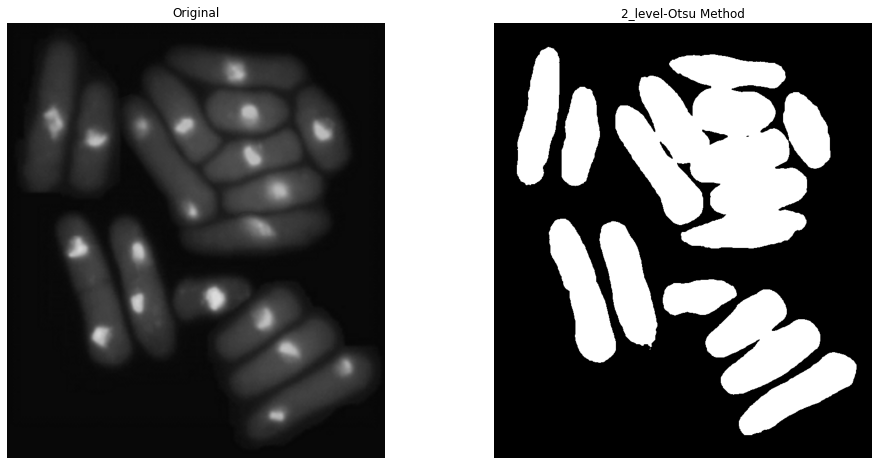

In [97]:
fig = plt.figure(figsize = (16, 8)) 
rows = 1
cols = 2
  
ax1 = fig.add_subplot(rows, cols, 1)
I_RGB = cv2.cvtColor(I, cv2.COLOR_GRAY2RGB)
ax1.imshow(I_RGB)
ax1.set_title('Original')
ax1.axis("off")

ax2 = fig.add_subplot(rows, cols, 2)
I_Otsu_RGB = cv2.cvtColor(I_Otsu, cv2.COLOR_GRAY2RGB)
ax2.imshow(I_Otsu_RGB)
ax2.set_title('2_level-Otsu Method')
ax2.axis("off")

plt.show()